In [1]:
import yfinance as yahoo
import pandas as pd
import numpy as np
import scipy.optimize as sco
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# import investment to track performance during 2020
portfolio = pd.read_excel('portfolioBacktest.xlsx')

portfolio

,Unnamed: 0,SharpeRatio,MinVaR,SortinoRatio,Sharpe,Benchmark,ComponentVaR
0,AAPL,0.0000,0.0043,0.067989,0.069385,0.04,0.045973
1,ADBE,0.1340,0.0029,0.106483,0.107081,0.04,0.109495
2,AMD,0.1124,0.0001,0.109923,0.122687,0.04,0.143737
3,AMZN,0.1500,0.0014,0.127529,0.121341,0.04,0.140599
4,BA,0.0874,0.0003,0.061965,0.067033,0.04,0.042908
5,BABA,0.0000,0.0650,0.000000,0.000000,0.04,0.000000
6,BAC,0.0000,0.0021,0.000000,0.000000,0.04,0.000000
7,C,0.0000,0.1380,0.000000,0.000000,0.04,0.000000
8,CMCSA,0.0000,0.0532,0.000000,0.000000,0.04,0.000000
9,CSCO,0.0000,0.0548,0.000000,0.000000,0.04,0.000000


In [3]:
portfolio = portfolio[portfolio.ComponentVaR!=0].dropna()
portfolio

,Unnamed: 0,SharpeRatio,MinVaR,SortinoRatio,Sharpe,Benchmark,ComponentVaR
0,AAPL,0.0000,0.0043,0.067989,0.069385,0.04,0.045973
1,ADBE,0.1340,0.0029,0.106483,0.107081,0.04,0.109495
2,AMD,0.1124,0.0001,0.109923,0.122687,0.04,0.143737
3,AMZN,0.1500,0.0014,0.127529,0.121341,0.04,0.140599
4,BA,0.0874,0.0003,0.061965,0.067033,0.04,0.042908
15,MA,0.0415,0.0028,0.108071,0.098558,0.04,0.092757
16,MSFT,0.0547,0.0022,0.112323,0.097381,0.04,0.090556
17,NFLX,0.0927,0.0027,0.092824,0.101962,0.04,0.099276
18,NVDA,0.1500,0.0002,0.124430,0.135191,0.04,0.174526
22,V,0.0000,0.0039,0.088463,0.079381,0.04,0.060173


In [4]:
# Set Initial quantity to simulate first Buy-&-Hold Strategy, with nominal fixed
# Capital requested to allocate investment
initial_capital = float(input("How much will you invest? "))

How much will you invest? 1000000


In [5]:
stocks = list(portfolio.iloc[:,0])
print(stocks)

['AAPL', 'ADBE', 'AMD', 'AMZN', 'BA', 'MA', 'MSFT', 'NFLX', 'NVDA', 'V']


In [6]:
start, end = dt.date(2020,1,1), dt.date(2020,12,31)
data = yahoo.download(stocks,start,end)["Adj Close"].fillna(method="ffill")

[*********************100%***********************]  10 of 10 completed


In [7]:
weights = portfolio['ComponentVaR'].values
print(weights)

[0.04597268 0.10949534 0.1437367  0.14059917 0.04290822 0.09275743
 0.09055592 0.09927598 0.17452584 0.06017271]


In [8]:
cartera = (data * weights)
cartera

,AAPL,ADBE,AMD,AMZN,BA,MA,MSFT,NFLX,NVDA,V
Date,,,,,,,,,,
2020-01-02,3.422418,36.618527,7.057472,266.858634,14.217577,27.955336,14.392622,32.742210,41.801518,11.429853
2020-01-03,3.389145,36.331650,6.985603,263.619224,14.193691,27.682590,14.213410,32.354040,41.132447,11.338950
2020-01-06,3.416150,36.539690,6.955419,267.543351,14.235492,27.756305,14.250148,33.339850,41.304941,11.314431
2020-01-07,3.400084,36.504654,6.935296,268.102933,14.386489,27.662316,14.120220,32.835529,41.805001,11.284529
2020-01-08,3.454779,36.995191,6.874927,266.009410,14.134400,28.150405,14.345130,33.680369,41.883412,11.477697
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,6.020583,54.409332,13.159095,447.846324,9.426507,30.499867,20.014671,51.075503,90.818013,12.353458
2020-12-24,6.067015,54.732341,13.196466,446.077576,9.317519,31.127039,20.171332,51.024871,90.709808,12.558044
2020-12-28,6.284006,54.632703,13.166281,461.722048,9.272037,31.911701,20.371461,51.536145,90.055336,12.794524


In [9]:
# Nominal = (inversion * weights inicial) // precio primer dia
nominal = (initial_capital * weights) // data.iloc[0,:].values
assets = (data * nominal)
total = pd.DataFrame((data * nominal).T.sum(),columns=['BuynHold'],index = data.index)

In [10]:
evolution = assets / total.values

<AxesSubplot:xlabel='Date'>

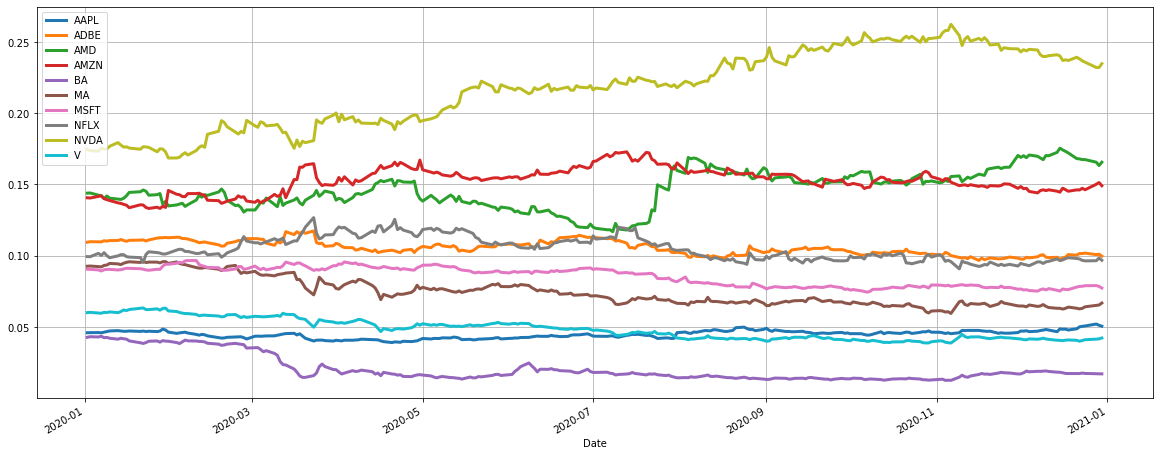

In [15]:
evolution.plot(figsize=(20,8),grid=True, lw=3.0)

<AxesSubplot:xlabel='Date'>

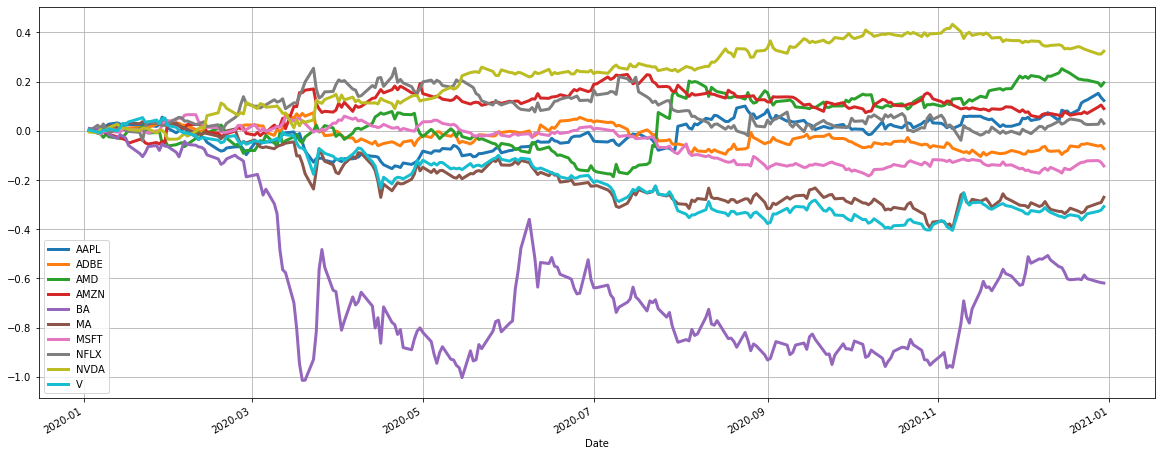

In [16]:
evolution.pct_change().cumsum().plot(figsize=(20,8),grid=True, lw=3.0)

In [14]:
evolution.iloc[-1,:] / evolution.iloc[0,:]

AAPL    1.099836
ADBE    0.910771
AMD     1.150901
AMZN    1.060020
BA      0.400386
MA      0.721439
MSFT    0.854021
NFLX    0.973915
NVDA    1.344244
V       0.703877
dtype: float64